In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/My Drive/UST/time_series_covid19_confirmed_US.csv")

In [ ]:
data

UID iso2 iso3  code3     FIPS      Admin2 Province_State  \
0     84001001   US  USA    840   1001.0     Autauga        Alabama   
1     84001003   US  USA    840   1003.0     Baldwin        Alabama   
2     84001005   US  USA    840   1005.0     Barbour        Alabama   
3     84001007   US  USA    840   1007.0        Bibb        Alabama   
4     84001009   US  USA    840   1009.0      Blount        Alabama   
...        ...  ...  ...    ...      ...         ...            ...   
3337  84056039   US  USA    840  56039.0       Teton        Wyoming   
3338  84056041   US  USA    840  56041.0       Uinta        Wyoming   
3339  84090056   US  USA    840  90056.0  Unassigned        Wyoming   
3340  84056043   US  USA    840  56043.0    Washakie        Wyoming   
3341  84056045   US  USA    840  56045.0      Weston        Wyoming   

     Country_Region        Lat       Long_  ... 2/28/23  3/1/23  3/2/23  \
0                US  32.539527  -86.644082  ...   19732   19759   19759   
1                US  30.727750  -87.722071  ...   69641   69767   69767   
2                US  31.868263  -85.387129  ...    7451    7474    7474   
3                US  32.996421  -87.125115  ...    8067    8087    8087   
4                US  33.982109  -86.567906  ...   18616   18673   18673   
...             ...        ...         ...  ...     ...     ...     ...   
3337             US  43.935225 -110.589080  ...   12130   12130   12130   
3338             US  41.287818 -110.547578  ...    6401    6401    6401   
3339             US   0.000000    0.000000  ...       0       0       0   
3340             US  43.904516 -107.680187  ...    2750    2750    2750   
3341             US  43.839612 -104.567488  ...    1905    1905    1905   

      3/3/23  3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0      19759   19759   19759   19759   19759   19790   19790  
1      69767   69767   69767   69767   69767   69860   69860  
2       7474    7474    7474    7474    7474    7485    7485  
3       8087    8087    8087    8087    8087    8091    8091  
4      18673   18673   18673   18673   18673   18704   18704  
...      ...     ...     ...     ...     ...     ...     ...  
3337   12130   12130   12130   12130   12134   12134   12134  
3338    6401    6401    6401    6401    6406    6406    6406  
3339       0       0       0       0       0       0       0  
3340    2750    2750    2750    2750    2755    2755    2755  
3341    1905    1905    1905    1905    1905    1905    1905  

[3342 rows x 1154 columns]

In [ ]:
data['iso3'].unique()

array(['USA', 'ASM', 'GUM', 'MNP', 'PRI', 'VIR'], dtype=object)

In [ ]:
count = 0
l = []
for i in data.columns:
  if count == 11:
    break
  l.append(i)
  count += 1

In [ ]:
l

['UID',
 'iso2',
 'iso3',
 'code3',
 'FIPS',
 'Admin2',
 'Province_State',
 'Country_Region',
 'Lat',
 'Long_',
 'Combined_Key']

In [ ]:
df = data.drop(columns=l)

In [ ]:
df

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
0           0        0        0        0        0        0        0        0   
1           0        0        0        0        0        0        0        0   
2           0        0        0        0        0        0        0        0   
3           0        0        0        0        0        0        0        0   
4           0        0        0        0        0        0        0        0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
3337        0        0        0        0        0        0        0        0   
3338        0        0        0        0        0        0        0        0   
3339        0        0        0        0        0        0        0        0   
3340        0        0        0        0        0        0        0        0   
3341        0        0        0        0        0        0        0        0   

      1/30/20  1/31/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  \
0           0        0  ...    19732   19759   19759   19759   19759   19759   
1           0        0  ...    69641   69767   69767   69767   69767   69767   
2           0        0  ...     7451    7474    7474    7474    7474    7474   
3           0        0  ...     8067    8087    8087    8087    8087    8087   
4           0        0  ...    18616   18673   18673   18673   18673   18673   
...       ...      ...  ...      ...     ...     ...     ...     ...     ...   
3337        0        0  ...    12130   12130   12130   12130   12130   12130   
3338        0        0  ...     6401    6401    6401    6401    6401    6401   
3339        0        0  ...        0       0       0       0       0       0   
3340        0        0  ...     2750    2750    2750    2750    2750    2750   
3341        0        0  ...     1905    1905    1905    1905    1905    1905   

      3/6/23  3/7/23  3/8/23  3/9/23  
0      19759   19759   19790   19790  
1      69767   69767   69860   69860  
2       7474    7474    7485    7485  
3       8087    8087    8091    8091  
4      18673   18673   18704   18704  
...      ...     ...     ...     ...  
3337   12130   12134   12134   12134  
3338    6401    6406    6406    6406  
3339       0       0       0       0  
3340    2750    2755    2755    2755  
3341    1905    1905    1905    1905  

[3342 rows x 1143 columns]

In [ ]:
new_df = df.T.sum(axis=1).to_frame(name='Sum')

In [ ]:
new_df

Sum
1/22/20          1
1/23/20          1
1/24/20          2
1/25/20          2
1/26/20          5
...            ...
3/5/23   103646975
3/6/23   103655539
3/7/23   103690910
3/8/23   103755771
3/9/23   103802702

[1143 rows x 1 columns]

In [ ]:
new_df.index = pd.to_datetime(new_df.index)


In [ ]:
new_df

Sum
2020-01-22          1
2020-01-23          1
2020-01-24          2
2020-01-25          2
2020-01-26          5
...               ...
2023-03-05  103646975
2023-03-06  103655539
2023-03-07  103690910
2023-03-08  103755771
2023-03-09  103802702

[1143 rows x 1 columns]

In [ ]:
from statsmodels.tsa.stattools import adfuller


In [ ]:
def test_stationarity(timeseries):
    # Dickey-Fuller test
    result = adfuller(timeseries['Sum'])

    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    print('Is the time series stationary?', 'No' if result[1] > 0.05 else 'Yes')

In [ ]:
test_stationarity(new_df)

ADF Statistic: -0.03337976177101416
p-value: 0.9556829980610129
Critical Values: {'1%': -3.436207340777824, '5%': -2.8641263411190323, '10%': -2.5681470422493593}
Is the time series stationary? No


<Axes: >

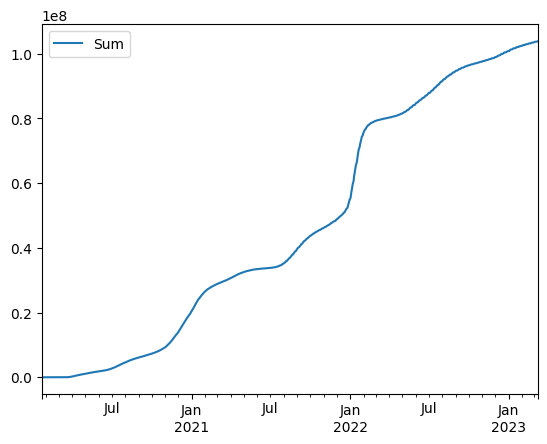

In [ ]:
new_df.plot()

In [ ]:
new_df = new_df.diff()

In [ ]:
test_stationarity(new_df[1:])

ADF Statistic: -4.326191879161946
p-value: 0.0004000393176799586
Critical Values: {'1%': -3.4362125920049498, '5%': -2.8641286575615426, '10%': -2.5681482759591785}
Is the time series stationary? Yes


<Axes: >

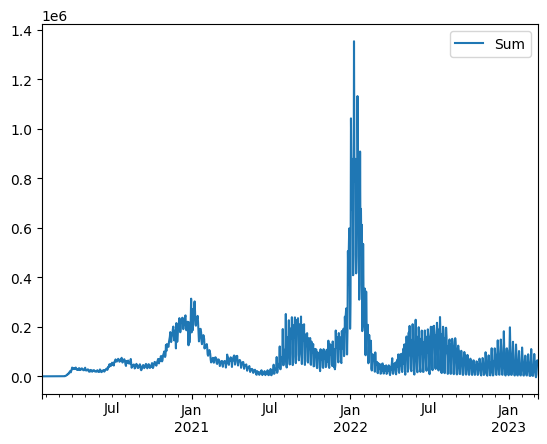

In [ ]:
new_df.plot()

In [ ]:
def find_best(data):
  p_values = range(0, 5)  # Change the range as per your requirement
  q_values = range(0, 5)  # Change the range as per your requirement

  best_aic = float("inf")
  best_p = 0
  best_q = 0

  # Grid search to find the best p and q values
  for p in p_values:
      for q in q_values:
          try:
              model = ARIMA(data, order=(p, 1, q))
              results = model.fit()
              aic = results.aic
              if aic < best_aic:
                  best_aic = aic
                  best_p = p
                  best_q = q
          except:
              continue

  print(f"Best AIC: {best_aic}")
  print(f"Best p: {best_p}")
  print(f"Best q: {best_q}")

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
find_best(new_df)

Best AIC: 27937.234700814064
Best p: 4
Best q: 4


In [ ]:
train = new_df [:1000]
test = new_df[1000:]

In [ ]:
model = ARIMA(train, order=(4, 1, 4))
arima_model = model.fit()


In [ ]:

import numpy as np


In [ ]:
forecast_50 = arima_model.forecast(steps=50)

In [ ]:
actual_values = test[:50]

In [ ]:
predicted_values = forecast_50

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
# Calculate various error metrics
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = mean_squared_error(actual_values, predicted_values, squared=False)
mape = mean_absolute_percentage_error(actual_values, predicted_values)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 22018.99
Mean Squared Error (MSE): 740620979.91
Root Mean Squared Error (RMSE): 27214.35
Mean Absolute Percentage Error (MAPE): 1.64%


In [ ]:
forecast_50 = arima_model.forecast(steps=50)
forecast_100 = arima_model.forecast(steps=100)
forecast_200 = arima_model.forecast(steps=200)

# Get residuals for the original dataset
residuals = arima_model.resid


# Calculate log-likelihoods for each forecast horizon
log_likelihood_50 = -0.5 * (len(forecast_50) * np.log(2 * np.pi * residuals.var()) + (1 / residuals.var()) * (forecast_50.values ** 2).sum())
log_likelihood_100 = -0.5 * (len(forecast_100) * np.log(2 * np.pi * residuals.var()) + (1 / residuals.var()) * (forecast_100.values ** 2).sum())
log_likelihood_200 = -0.5 * (len(forecast_200) * np.log(2 * np.pi * residuals.var()) + (1 / residuals.var()) * (forecast_200.values ** 2).sum())

print(f"Log-likelihood for 50 steps forecast: {log_likelihood_50}")
print(f"Log-likelihood for 100 steps forecast: {log_likelihood_100}")
print(f"Log-likelihood for 200 steps forecast: {log_likelihood_200}")

Log-likelihood for 50 steps forecast: -601.3993646079155
Log-likelihood for 100 steps forecast: -1201.7049934735483
Log-likelihood for 200 steps forecast: -2402.209769788006


In [ ]:
# Calculate log-likelihood based on residuals
sigma2 = residuals.var()
log_likelihood = -0.5 * (len(residuals) * np.log(2 * np.pi * sigma2) + (1 / sigma2) * (residuals ** 2).sum())
print(f"Log-likelihood: {log_likelihood}")

Log-likelihood: -12208.037147536894
